first we  import the needed libraries

In [7]:
import numpy as np
import pylab as plt
import pandas as pd

then we read data from the file 
then we convert each column to numpy array so we can use it in the model

In [8]:
df = pd.read_csv("shrink_ray_dataset.csv")
x = df["Power"].to_numpy()
y = df["Shrinkage"].to_numpy()

we make a class called Linear_Regression_model
first cost fun: to calculate error and know overall model preformance
gradiant_decent: to calculate partial deravative of the cost function for w and b
train: train model to get best parameters values 
predict: pass x values and predict y value according to the parameter that the model calculate it
predictx: pass y values and predict x

In [9]:
class Linear_Regression_model:

    def cost_fn(self):
        m = self.y.shape[0]
        error = np.sum(((self.w*self.x+self.b)-self.y)**2)
        j = error/(2*m)
        return j
    
    def gradiant_decent(self):
        m = self.y.shape[0]
        dj_dw = np.dot(((self.w*self.x+self.b)-self.y),self.x)
        dj_db = np.sum((self.w*self.x+self.b)-self.y)
        dj_dw /= m 
        dj_db /= m
        return dj_dw,dj_db
    
    def train(self,x,y,w=0,b=0,alpha=.00001,num_of_iterations=1000):
        self.x = x
        self.y = y
        self.w = w
        self.b = b
        for i in range(num_of_iterations):
            dj_dw,dj_db = self.gradiant_decent()
            self.w = self.w - alpha*dj_dw
            self.b = self.b - alpha*dj_db

    def predict(self,x):
        y = self.w*x+self.b
        return y
    
    def predictx(self,y):
        x = (y-self.b)/self.w
        return x

train model by the sets i got from data file
print cost fun to see the model preformance

In [10]:
test = Linear_Regression_model()
test.train(x,y)
print(f"cost_fun = {test.cost_fn()}")

cost_fun = 5.531103363958289


we plot x and y values of the set
and plot values that the model predict

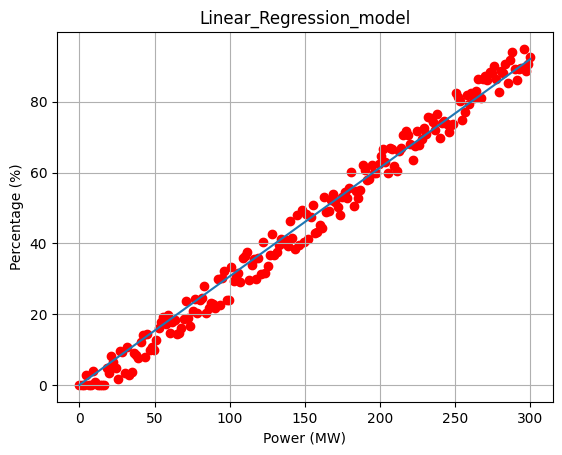

In [11]:
plt.scatter(x,y,color="red")
plt.plot(x,test.predict(x))
plt.title("Linear_Regression_model")
plt.xlabel("Power (MW)")
plt.ylabel("Percentage (%)")
plt.grid()
plt.show()

2-If Gru needs to shrink the moon with a percentage 85% where
should he adjust the knob?

In [14]:
z = 85
print(f"knob value = {test.predictx(z)}")

knob value = 276.94409932876476
